In [1]:
import numpy as np
import emcee
import corner
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
import sys


/Users/Oliver/Library/Python/3.7/lib/python/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
rocrit_file = '../data/jvs_models/rocrit_population.h5'
standard_file = '../data/jvs_models/standard_population.h5'

In [5]:
mapper = mapper = {'period': 'Prot',
                        'age': 'Age',
                        'mass': 'Mass'}

In [7]:
df_rocrit = pd.read_hdf(rocrit_file, key='sample', mode='r')
df_rocrit

,Teff,logg,age,log(L/Lsun),kepmag,period,[Fe/H],sdss_g,sdss_r,sdss_i,sdss_z,2mass_j,2mass_h,2mass_k,distmod,av
0,5058.112357,3.440028,1.877246,0.974361,11.350579,45.489845,-0.11,11.991957,11.279396,11.073495,10.975381,9.958406,9.495029,9.427129,9.0,0.028
1,5058.112357,3.440028,1.877246,0.974361,11.350579,45.489845,-0.11,11.991957,11.279396,11.073495,10.975381,9.958406,9.495029,9.427129,9.0,0.028
2,5681.518524,4.542529,0.197387,-0.142047,12.961222,2.563267,-0.09,13.394164,12.894715,12.772148,12.742902,11.847200,11.512971,11.469764,7.9,0.016
3,6893.134017,3.943565,2.342860,0.951074,11.945937,0.389400,-0.21,12.073070,11.904688,11.914732,11.976291,11.234554,11.081642,11.056506,9.6,0.024
4,5472.994352,4.517527,3.565857,-0.196710,14.819542,23.032083,0.05,15.333002,14.746730,14.597419,14.547753,13.613116,13.242429,13.190847,9.6,0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149339,6328.848234,3.809987,2.044654,1.010482,9.121655,3.139656,0.39,9.399554,9.056875,9.016626,9.052102,8.256225,8.054327,8.020161,7.0,0.012
149340,6856.053809,4.091446,1.431258,0.831731,11.227529,0.303745,0.05,11.375863,11.181648,11.187976,11.251155,10.507494,10.354486,10.328873,8.6,0.028
149341,5858.392134,4.483584,1.743615,-0.013671,12.943633,13.408613,-0.09,13.329323,12.880461,12.776225,12.760292,11.889537,11.584823,11.545691,8.2,0.027
149342,4895.563842,4.640838,2.465428,-0.626007,10.576657,19.081748,-0.29,11.276281,10.505737,10.272292,10.156506,9.112295,8.599668,8.527534,4.2,0.006


In [ ]:
df_rocrit.rename(columns=self.mapper, inplace=True)

In [8]:
ati = pd.read_csv('../data/atium.csv', index_col=0)
ati

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,eV2,l_P,P,u_P,l_vsini,vsini,u_vsini,rhat_flag,eye_flag,ebprp
0,1435467,6326,3.0164,70.369,77,0.034,0.10,6.3,0.01,0.3513,...,0.059509,0.620728,6.541180,0.757775,0.672485,11.669772,0.724637,NaN,0,0.000777
1,2837475,6614,1.6270,75.729,77,0.041,0.10,8.2,0.01,0.1757,...,0.046604,0.154079,3.499114,0.172064,0.555348,22.351415,0.540087,NaN,0,0.000587
2,3427720,6045,2.2339,120.068,77,0.031,0.10,10.7,-0.06,0.2396,...,0.031153,11.821919,31.590512,10.236450,0.305072,1.473754,0.278017,NaN,0,0.000607
3,3456181,6384,2.0901,52.264,77,0.041,0.10,8.3,-0.15,0.1278,...,0.059344,2.790842,10.699926,2.006340,0.734456,8.634898,0.746225,NaN,0,0.000788
4,3632418,6193,2.6331,60.704,77,0.019,0.10,3.0,-0.12,0.1757,...,0.034584,0.729588,11.205550,0.624963,0.222056,8.216637,0.228105,NaN,0,0.000551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,11295426,5793,6.3100,101.570,74,0.100,0.07,13.0,0.12,0.3400,...,0.034581,14.539683,42.614984,11.500965,0.165275,1.203259,0.158763,NaN,0,0.000404
91,11401755,5911,7.1000,67.900,66,1.200,0.06,44.0,-0.20,0.5900,...,0.052362,4.348832,18.475557,4.689162,0.723918,3.951468,0.632003,NaN,2,0.000569
92,11807274,6225,3.5900,75.710,75,0.310,0.08,56.0,0.00,0.4500,...,0.044712,0.527579,7.866009,0.493370,0.480577,9.841369,0.464237,NaN,0,0.000747
93,11853905,5781,6.7100,74.400,76,1.100,0.10,42.0,0.09,0.6700,...,0.065522,17.163898,34.004106,18.869753,0.602662,1.845831,0.642007,NaN,0,0.000700


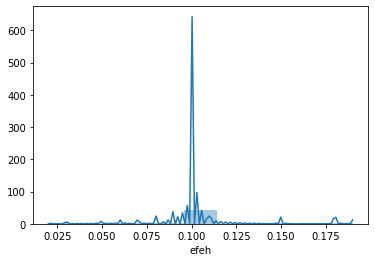

In [10]:
sns.distplot(ati.efeh)

In [11]:
ati.columns

Index(['KIC', 'Teff', 'age', 'dnu', 'eTeff', 'ednu', 'efeh', 'enumax', 'feh',
       'loage', 'lomodlogg', 'lomodmass', 'lomodrad', 'modlogg', 'modmass',
       'modrad', 'numax', 'source', 'upage', 'upmodlogg', 'upmodmass',
       'upmodrad', 'G', 'bprp', 'hrclass', 'neff_xsplit', 'neff_cosi',
       'neff_split', 'neff_i', 'l_nus*', 'nus*', 'u_nus*', 'l_cosi', 'cosi',
       'u_cosi', 'l_nus', 'nus', 'u_nus', 'l_i', 'i', 'u_i', 'fit_numax',
       'efit_numax', 'fit_d01', 'efit_d01', 'fit_d02', 'efit_d02',
       'fit_epsilon', 'efit_epsilon', 'V1', 'eV1', 'V2', 'eV2', 'l_P', 'P',
       'u_P', 'l_vsini', 'vsini', 'u_vsini', 'rhat_flag', 'eye_flag', 'ebprp'],
      dtype='object')